# BCRP Webscrapper
The module ```bcrp_webscrapper``` was created for a workshop at the Artificial Intelligence and Computational Methods in the Social Sciences lab - QLAB PUCP.
It allows us to easily seach, import and download time series data from the Peruvian Central Bank of Reserve (BCRP) Statistics Database

In this notebook we will be testing each one of the functions inside the module

# Libraries

In [59]:
# We import all necessary libraries

# Selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Options driver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select

# Dataframes
import pandas as pd
import itertools
import os
from io import StringIO
import time
import requests

# Simulating human behavior
import time
from time import sleep
import random

# Clear data
import unidecode

# Json files
import json
import re
import numpy as np
import itertools
from pandas import json_normalize

# To use explicit waits
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Download files
import urllib.request
import requests
from openpyxl import Workbook

# Graphs files
from IPython.display import SVG, display, IFrame

# Changing directory
import sys

In [58]:
# # We import all functions from our module bcrp_webscrapper.py
sys.path.append('../')  # Move two levels up to the project root

from modules.bcrp_webscrapper import *

# Code

### ```bcrp_search()```
This function provides a basic searcher for the BCRP Database website. We provide the name of the series and the frequency we want and search for the data available. Ir returns a dataframe with all series that match our input.

In [3]:
bcrp_search('PBI')

,Código,Descripción,Frecuencia
0,PN39868FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
1,PN39867FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
2,PN39866FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
3,PN39524FM,Operaciones del sector público no financiero (...,Mensual
4,PN39351BQ,Posición de activos y pasivos externos (porcen...,Trimestral
...,...,...,...
1015,CD10438DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1016,CD10437DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1017,CD10435DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1018,CD10434DA,"PIB nominal y real, agregado y per cápita, 193...",Anual


In [4]:
bcrp_search('Inflación', 'Mensual')

,Código,Descripción,Frecuencia
0,PN09830PM,Inflación de socios comerciales - IPC Externo ...,Mensual
1,PN09828PM,Inflación de socios comerciales - IPC Externo ...,Mensual
2,PN01311PM,Índice de precios al consumidor Lima Metropoli...,Mensual
3,PN01310PM,Índice de precios al consumidor Lima Metropoli...,Mensual
4,PN01309PM,Índice de precios al consumidor Lima Metropoli...,Mensual
5,PN01308PM,Índice de precios al consumidor Lima Metropoli...,Mensual
6,PN01306PM,Índice de precios al consumidor Lima Metropoli...,Mensual
7,PN01305PM,Índice de precios al consumidor Lima Metropoli...,Mensual
8,PN01304PM,Índice de precios al consumidor Lima Metropoli...,Mensual
9,PN01303PM,Índice de precios al consumidor Lima Metropoli...,Mensual


In [5]:
bcrp_search('Expectativas', 'Mensual')

,Código,Descripción,Frecuencia
0,PD39931AM,Expectativas empresariales por zonas - Zona Su...,Mensual
1,PD39930AM,Expectativas empresariales por zonas - Zona Su...,Mensual
2,PD39929AM,Expectativas empresariales por zonas - Zona Su...,Mensual
3,PD39928AM,Expectativas empresariales por zonas - Zona Su...,Mensual
4,PD39927AM,Expectativas empresariales por zonas - Zona Su...,Mensual
...,...,...,...
113,PD38044AM,Expectativas empresariales totales - Índice de...,Mensual
114,PD38043AM,Expectativas empresariales totales - Índice de...,Mensual
115,PD38042AM,Expectativas empresariales totales - Índice de...,Mensual
116,PD38041AM,Expectativas empresariales totales - Índice de...,Mensual


We now test the duration of the code under different specifications

In [61]:
st = time.time()
bcrp_search('Inflación')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 6.587113857269287 seconds


In [62]:
st = time.time()
bcrp_search('Inflación', 'Mensual')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 7.28118896484375 seconds


In [63]:
st = time.time()
bcrp_search('PBI')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 7.123378753662109 seconds


In [64]:
st = time.time()
bcrp_search('PBI', 'Trimestral')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 7.104185104370117 seconds


In [60]:
st = time.time()
print(bcrp_search('Expectativas', 'Mensual'))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

        Código                                        Descripción Frecuencia
0    PD39931AM  Expectativas empresariales por zonas - Zona Su...    Mensual
1    PD39930AM  Expectativas empresariales por zonas - Zona Su...    Mensual
2    PD39929AM  Expectativas empresariales por zonas - Zona Su...    Mensual
3    PD39928AM  Expectativas empresariales por zonas - Zona Su...    Mensual
4    PD39927AM  Expectativas empresariales por zonas - Zona Su...    Mensual
..         ...                                                ...        ...
113  PD38044AM  Expectativas empresariales totales - Índice de...    Mensual
114  PD38043AM  Expectativas empresariales totales - Índice de...    Mensual
115  PD38042AM  Expectativas empresariales totales - Índice de...    Mensual
116  PD38041AM  Expectativas empresariales totales - Índice de...    Mensual
117  PD12912AM  Expectativas macroeconómicas - Expectativa de ...    Mensual

[118 rows x 3 columns]
Execution time: 7.060730218887329 seconds


### ```bcrp_scrapper()```
This function scraps series from the BCRP Database and gives us a dataframe with the series using the API of the https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api webpage. We need to specify the code of the series (or a list of up to 10 codes in case there are multiple series), the starting year, the ending year and the frequency.

In [76]:
bcrp_scrapper('PD04637PD', '2012-03-12' , '2022-05-30' , 'Diario' ).head()

,Tipo de cambio - TC Interbancario (S/ por US$) - Compra
Fecha,
2012-03-12,2.668
2012-03-13,2.669
2012-03-14,2.669
2012-03-15,2.671
2012-03-16,2.670


In [77]:
bcrp_scrapper( ['PD04637PD', 'PD04638PD'] , '2012-03-12' , '2022-05-30' , 'Diario' ).head()

,Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tipo de cambio - TC Interbancario (S/ por US$) - Venta
Fecha,,
2012-03-12,2.668,2.669
2012-03-13,2.669,2.670
2012-03-14,2.669,2.670
2012-03-15,2.671,2.673
2012-03-16,2.670,2.671


In [78]:
bcrp_scrapper(['PN01288PM', 'PN01218PM', 'PN01219PM'], '2009-06', '2020-03', 'Mensual' ).head()

,Tipo de cambio - fin de periodo (S/ por US$) - Bancario - Venta,Tipo de cambio - fin de periodo (S/ por US$) - Bancario - Promedio,Índice de precios Lima Metropolitana (índice 2009 = 100) (descontinuada) - IPC Sin Alimentos
Fecha,,,
2009-06-01,3.011,3.010,99.60
2009-07-01,2.987,2.986,99.75
2009-08-01,2.948,2.947,99.61
2009-09-01,2.885,2.884,99.65
2009-10-01,2.906,2.904,99.54


In [79]:
bcrp_scrapper(['PN39030BQ', 'PD37942PQ'], '2020-03', '2022-06', 'Trimestral').head()

,"Departamentos (Sector Alto): Barranco, La Molina, Miraflores, San Borja, San Isidro y Surco - Precios por m2 (S/ Constantes del 2009)",Balanza comercial - valores FOB (millones US$) - Exportaciones
Fecha,,
2020-03-01,4901,10298
2020-06-01,5095,6779
2020-09-01,5180,11689
2020-12-01,5278,14060
2021-03-01,5242,13594


In [83]:
bcrp_scrapper(['PD09919MA', 'PD09920MA', 'PD09921MA', 'PD09922MA', 'PD09923MA', 'PD09924MA', 'PD09925MA', 'PD09926MA', 'PD09932MA', 'PD09933MA'], '2009-01', '2023-01', 'Anual').head()

,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - Total - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - ME (millones S/),Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - ME (millones US$),Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - Total - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - ME (millones S/),Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - ME (millones US$),Crédito al sector privado del sistema bancario (fin de periodo) - Banco de la Nación - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Banco de la Nación - ME (millones S/)
Fecha,,,,,,,,,,
2009-01-01,91768,45943,45826,15857,89300,43585,45714,15818,2358,111
2010-01-01,104896,54690,50206,17867,101922,51768,50155,17849,2922,51
2011-01-01,127594,65297,62298,23073,124475,62236,62239,23052,3061,58
2012-01-01,143382,74947,68435,26837,140161,71734,68427,26834,3213,7
2013-01-01,171752,94339,77413,27647,167703,90449,77253,27590,3889,159


In [81]:
st = time.time()
bcrp_scrapper(['PN01288PM', 'PN01218PM', 'PN01219PM'], '2009-06', '2020-03', 'Mensual' ).head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 6.507138967514038 seconds


In [82]:
st = time.time()
bcrp_scrapper(['PN39030BQ', 'PD37942PQ'], '2020-03', '2022-06', 'Trimestral').head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.993280410766602 seconds


In [80]:
st = time.time()
bcrp_scrapper(['PD09919MA', 'PD09920MA', 'PD09921MA', 'PD09922MA', 'PD09923MA', 'PD09924MA', 'PD09925MA', 'PD09926MA', 'PD09932MA', 'PD09933MA'], '2009-01', '2023-01', 'Anual').head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.9020702838897705 seconds


### ```bcrp_graph()```
This function provides a basic grapher for the BCRP Database website. We provide the name of the series and the dates. Ir returns a png or jpg graph with all series that match our input.

Most recent download: C:\Users\estca/Downloads\grafico.png


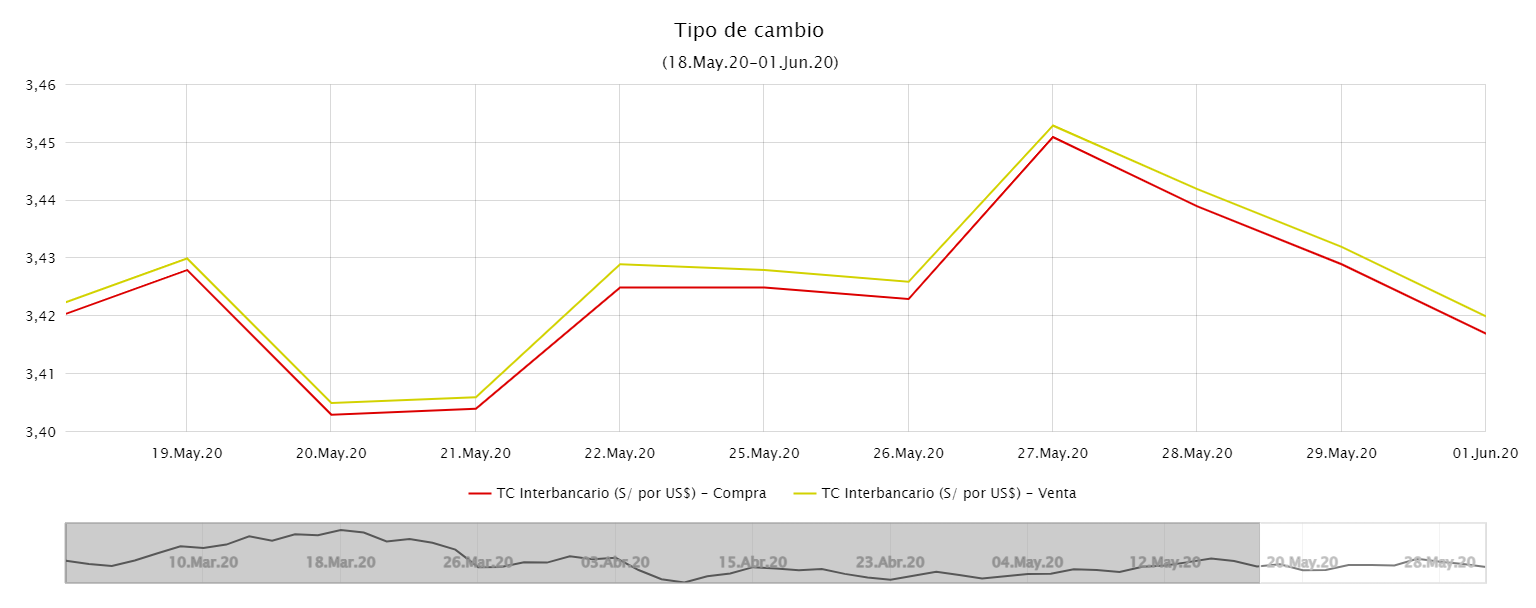

In [75]:
bcrp_graph( ['PD04637PD', 'PD04638PD'] , '2020-03-01' , '2020-06-01')

Most recent download: C:\Users\estca/Downloads\grafico (1).jpg


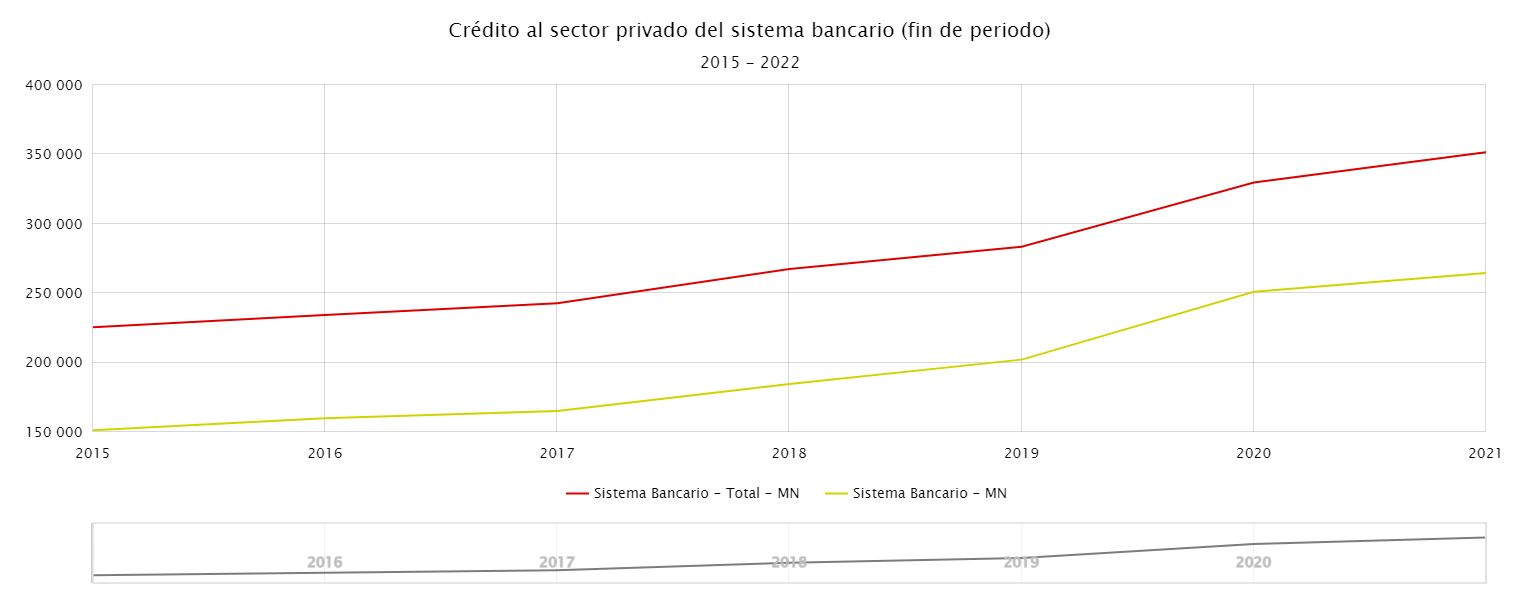

In [92]:
bcrp_graph( ['PD09919MA', 'PD09920MA'] , '2015' , '2022' , format= 'jpg')